# Importing CSV file (e.g. IRIS) to a CoLab Notebook

In [0]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "IRIS.csv" with length 2614 bytes


In [4]:
uploaded

{u'IRIS.csv': 'sepal_length,sepal_width,petal_length,petal_width,class\n5.1,3.5,1.4,0.2,0\n4.9,3,1.4,0.2,0\n4.7,3.2,1.3,0.2,0\n4.6,3.1,1.5,0.2,0\n5,3.6,1.4,0.2,0\n5.4,3.9,1.7,0.4,0\n4.6,3.4,1.4,0.3,0\n5,3.4,1.5,0.2,0\n4.4,2.9,1.4,0.2,0\n4.9,3.1,1.5,0.1,0\n5.4,3.7,1.5,0.2,0\n4.8,3.4,1.6,0.2,0\n4.8,3,1.4,0.1,0\n4.3,3,1.1,0.1,0\n5.8,4,1.2,0.2,0\n5.7,4.4,1.5,0.4,0\n5.4,3.9,1.3,0.4,0\n5.1,3.5,1.4,0.3,0\n5.7,3.8,1.7,0.3,0\n5.1,3.8,1.5,0.3,0\n5.4,3.4,1.7,0.2,0\n5.1,3.7,1.5,0.4,0\n4.6,3.6,1,0.2,0\n5.1,3.3,1.7,0.5,0\n4.8,3.4,1.9,0.2,0\n5,3,1.6,0.2,0\n5,3.4,1.6,0.4,0\n5.2,3.5,1.5,0.2,0\n5.2,3.4,1.4,0.2,0\n4.7,3.2,1.6,0.2,0\n4.8,3.1,1.6,0.2,0\n5.4,3.4,1.5,0.4,0\n5.2,4.1,1.5,0.1,0\n5.5,4.2,1.4,0.2,0\n4.9,3.1,1.5,0.1,0\n5,3.2,1.2,0.2,0\n5.5,3.5,1.3,0.2,0\n4.9,3.1,1.5,0.1,0\n4.4,3,1.3,0.2,0\n5.1,3.4,1.5,0.2,0\n5,3.5,1.3,0.3,0\n4.5,2.3,1.3,0.3,0\n4.4,3.2,1.3,0.2,0\n5,3.5,1.6,0.6,0\n5.1,3.8,1.9,0.4,0\n4.8,3,1.4,0.3,0\n5.1,3.8,1.6,0.2,0\n4.6,3.2,1.4,0.2,0\n5.3,3.7,1.5,0.2,0\n5,3.3,1.4,0.2,0\n7,3.2,4.7,

##Store the CSV File Data in a Pandas Dataframe

In [0]:
import io
import pandas as pd

In [0]:
df = pd.read_csv(io.StringIO(uploaded['IRIS.csv'].decode('utf-8')))

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##Creating the Dataset

In [0]:
dataset = df.values
X = dataset[:,0:4].astype('float32')
y = dataset[:,4]

###Converting y values to one-hot representation

In [0]:
from keras.utils import np_utils

NB_CLASSES = 3
y_one_hot = np_utils.to_categorical(y, NB_CLASSES)
print "Size(X) = ", X.shape
print "Size(y_one_hot) = ", y_one_hot.shape

Size(X) =  (150, 4)
Size(y_one_hot) =  (150, 3)


###Spliting the dataset to training and testing datasets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_one_hot, y_test_one_hot = train_test_split(X, y_one_hot, test_size=0.2)

print "Size(X_train) = ", X_train.shape
print "Size(y_train_one_hot) = ", y_train_one_hot.shape
print "Size(X_test) = ", X_test.shape
print "Size(y_test_one_hot) = ", y_test_one_hot.shape

Size(X_train) =  (120, 4)
Size(y_train_one_hot) =  (120, 3)
Size(X_test) =  (30, 4)
Size(y_test_one_hot) =  (30, 3)


##Fitting a Logistic Regression Model to the IRIS Dataset

###Creating the logistic model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
NB_CLASSES = 3
INPUT_DIM  = 4

model = Sequential()
model.add(Dense(NB_CLASSES, activation='softmax', input_shape=(INPUT_DIM,)))
model.summary()

W0707 13:50:39.630455 139939638048640 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 13:50:39.679632 139939638048640 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 13:50:39.686115 139939638048640 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


###Defining the optimizer and compiling the model

In [0]:
from keras.optimizers import SGD

OPTIMIZER = SGD(lr=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

###Fitting the model

In [0]:
BATCH_SIZE = 8
EPOCHES = 50
VERBOSE = 1

model_history = model.fit(x=X_train, y=y_train_one_hot, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE)

W0707 13:51:25.759929 139939638048640 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 13:51:25.797925 139939638048640 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
120/120 [==============================] - 1s 5ms/step - loss: 1.3085 - acc: 0.5833
Epoch 2/50
120/120 [==============================] - 0s 136us/step - loss: 0.9663 - acc: 0.6417
Epoch 3/50
120/120 [==============================] - 0s 128us/step - loss: 0.7151 - acc: 0.7500
Epoch 4/50
120/120 [==============================] - 0s 137us/step - loss: 0.7873 - acc: 0.7333
Epoch 5/50
120/120 [==============================] - 0s 130us/step - loss: 0.6223 - acc: 0.7333
Epoch 6/50
120/120 [==============================] - 0s 145us/step - loss: 0.4764 - acc: 0.8000
Epoch 7/50
120/120 [==============================] - 0s 139us/step - loss: 0.5552 - acc: 0.7750
Epoch 8/50
120/120 [==============================] - 0s 146us/step - loss: 0.4003 - acc: 0.8333
Epoch 9/50
120/120 [==============================] - 0s 139us/step - loss: 0.3964 - acc: 0.8333
Epoch 10/50
120/120 [==============================] - 0s 132us/step - loss: 0.4914 - acc: 0.8000
Epoch 11/50
120/120 [==========

###Evaluating the model

In [0]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

('Test score:', 0.12529069185256958)
('Test accuracy:', 1.0)


In [0]:
y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print "True class = ", y_test_one_hot[0], "Predicted class = ", y_classes[0]

True class =  [0. 0. 1.] Predicted class =  2


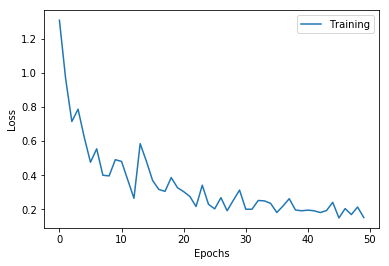

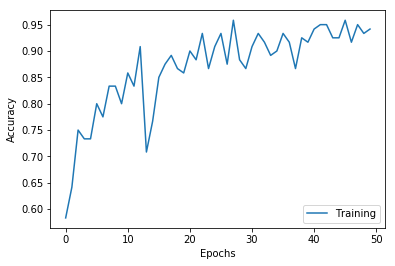

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.legend(['Training'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.legend(['Training'], loc='lower right')
    plt.show()

plot_history(model_history)